In [6]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [9]:
X_train[0].shape

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

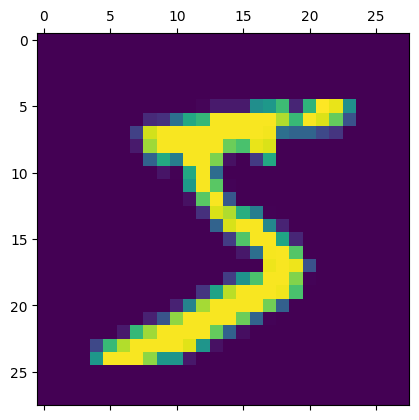

In [11]:
plt.matshow(X_train[0])

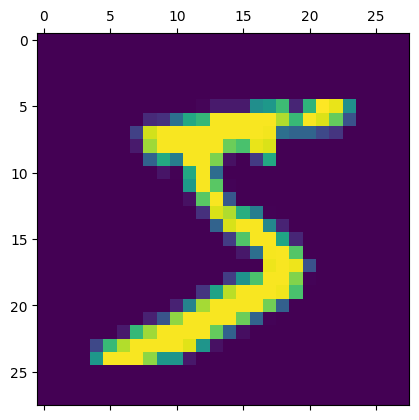

In [11]:
plt.matshow(X_train[0])

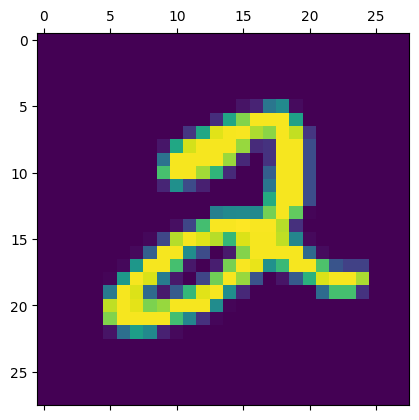

In [12]:
plt.matshow(X_train[5])

In [13]:
y_train[0]

5

In [14]:
y_train[5]

2

In [20]:
#scaing
X_train = X_train / 255
X_test = X_test / 255

In [21]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [22]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [23]:
X_train_flattened.shape

(60000, 784)

In [25]:
#sequencial means I am having a stack of layers in my neural network 
#dense means the dense network of neuron between layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# Dense(output, input)
#now we need to compile the data, optimizer allow you to train effeciently
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4673 - accuracy: 0.8767
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9147
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2831 - accuracy: 0.9208
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2725 - accuracy: 0.9231
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2663 - accuracy: 0.9254
Epoch 6/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9278


In [26]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2654 - accuracy: 0.9271


[0.2654304504394531, 0.9271000027656555]

In [27]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.30757166e-02, 1.45208062e-07, 5.86464815e-02, 9.72638190e-01,
       2.32492504e-03, 1.17324606e-01, 8.35869116e-07, 9.99804497e-01,
       9.20022205e-02, 7.06654072e-01], dtype=float32)

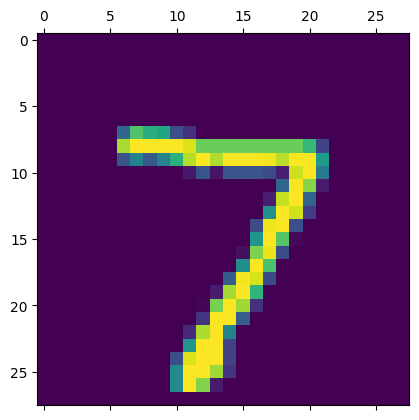

In [28]:
plt.matshow(X_test[0])


In [29]:
np.argmax(y_predicted[0])
#tells which argument is maximum

7

In [30]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [31]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [32]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1116,    4,    1,    0,    1,    4,    2,    7,    0],
       [   3,    9,  943,   10,    7,    5,   12,    8,   30,    5],
       [   4,    0,   26,  915,    1,   25,    2,    9,   19,    9],
       [   1,    2,    8,    1,  910,    0,   10,    3,    9,   38],
       [  10,    3,    4,   34,   10,  777,   13,    7,   28,    6],
       [  11,    3,    8,    1,    7,   14,  910,    2,    2,    0],
       [   1,    5,   26,    7,    6,    1,    0,  939,    3,   40],
       [   5,    9,    7,   21,    9,   27,    9,   10,  867,   10],
       [   9,    7,    2,   10,   23,    7,    0,   14,    6,  931]])>

Text(95.72222222222221, 0.5, 'Truth')

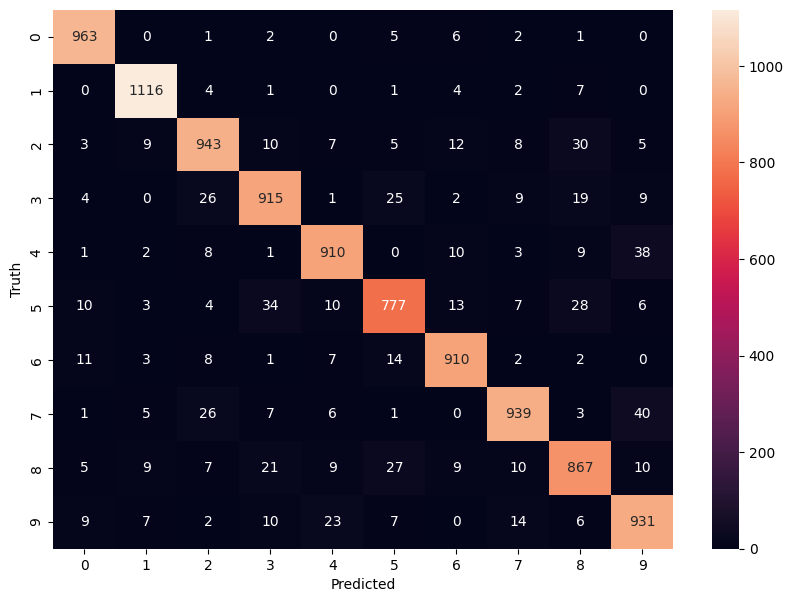

In [33]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Hidden Layer

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2758 - accuracy: 0.9214
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1256 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0885 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0683 - accuracy: 0.9795
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0539 - accuracy: 0.9837


In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0882 - accuracy: 0.9719


[0.08817096799612045, 0.9718999862670898]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

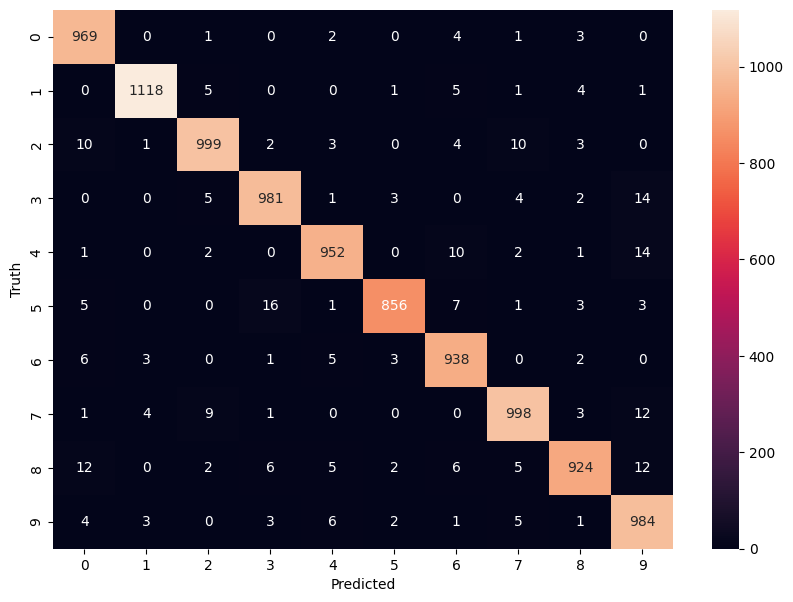

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Using Flatten layer so that we don't have to call .reshape on input dataset

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.2696 - accuracy: 0.9231
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1195 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0835 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0636 - accuracy: 0.9805
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0519 - accuracy: 0.9842
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0339 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0273 - accuracy: 0.9917
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.018

In [38]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0905 - accuracy: 0.9765


[0.09047942608594894, 0.9764999747276306]